In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
# Load the dataset
file_path = "Companies_Information.csv" 
data = pd.read_csv(file_path)

In [3]:
# Preview the dataset
print(data.head())

   Unnamed: 0 company_name  rating  company_reviews   company_age  \
0           0          TCS     3.9  (54.2k Reviews)  55 years old   
1           1          TCS     3.9  (54.2k Reviews)  55 years old   
2           2    Accenture     4.1  (34.4k Reviews)  34 years old   
3           3          TCS     3.9  (54.2k Reviews)  55 years old   
4           4    Accenture     4.1  (34.4k Reviews)  34 years old   

         number_of_employees  
0  1 Lakh+ Employees (India)  
1  1 Lakh+ Employees (India)  
2  1 Lakh+ Employees (India)  
3  1 Lakh+ Employees (India)  
4  1 Lakh+ Employees (India)  


In [4]:
data = data.drop(columns=['Unnamed: 0'], errors='ignore')  # Drop index-like column

In [5]:
# Convert reviews to numeric
data['company_reviews'] = data['company_reviews'].str.extract(r'(\d+\.\d+|\d+)').astype(float)

In [6]:
# Convert age to numeric
data['company_age'] = data['company_age'].str.extract(r'(\d+)').astype(float)

In [7]:
# Clean `number_of_employees` to extract numeric values and handle edge cases
data['number_of_employees'] = (
    data['number_of_employees']
    .str.extract(r'(\d+)')  # Extract numeric parts (e.g., '1+' becomes '1')
    .astype(float)          # Convert to float
)

In [8]:
print(data.describe())

             rating  company_reviews   company_age  number_of_employees
count  46035.000000     46035.000000  46035.000000         46035.000000
mean       3.964086        26.484946     42.301075            14.513978
std        0.148906        11.416650     28.391275            20.379114
min        3.400000         7.000000      5.000000             1.000000
25%        3.900000        16.000000     29.000000             1.000000
50%        4.000000        25.400000     32.000000             1.000000
75%        4.100000        34.400000     55.000000            10.000000
max        4.200000        54.200000    178.000000            50.000000


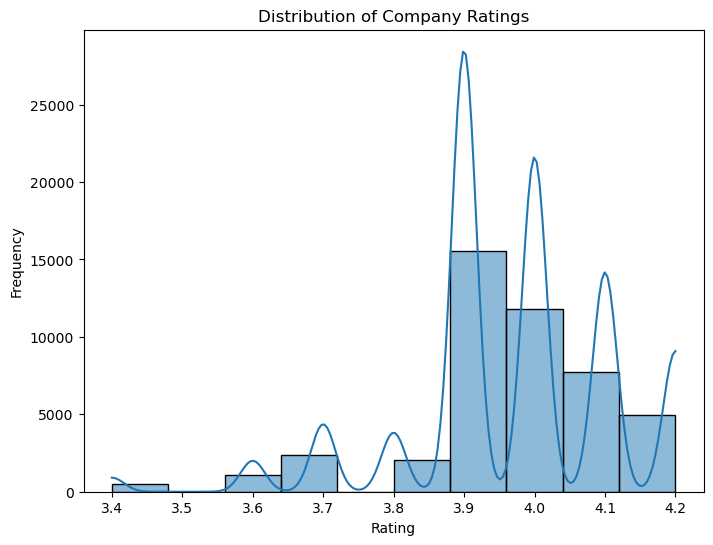

In [9]:
plt.figure(figsize=(8, 6))
sns.histplot(data['rating'], kde=True, bins=10)
plt.title('Distribution of Company Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

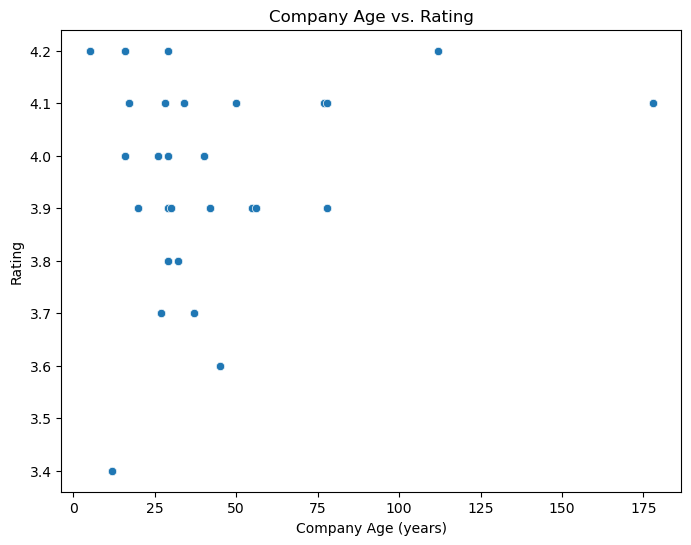

In [10]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='company_age', y='rating')
plt.title('Company Age vs. Rating')
plt.xlabel('Company Age (years)')
plt.ylabel('Rating')
plt.show()

In [11]:
# Use `company_age` and `company_reviews` to predict `rating`
X = data[['company_age', 'company_reviews']].dropna()
y = data.loc[X.index, 'rating']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [14]:
# Make predictions
y_pred = model.predict(X_test)

In [15]:
mse = mean_squared_error(y_test, y_pred)

In [16]:
# Display the results
print(f"Mean Squared Error: {mse}")
print(f"Model Coefficients: {model.coef_}")
print(f"Model Intercept: {model.intercept_}")

Mean Squared Error: 0.021384266249034688
Model Coefficients: [ 0.00074709 -0.00063396]
Model Intercept: 3.948977313535644


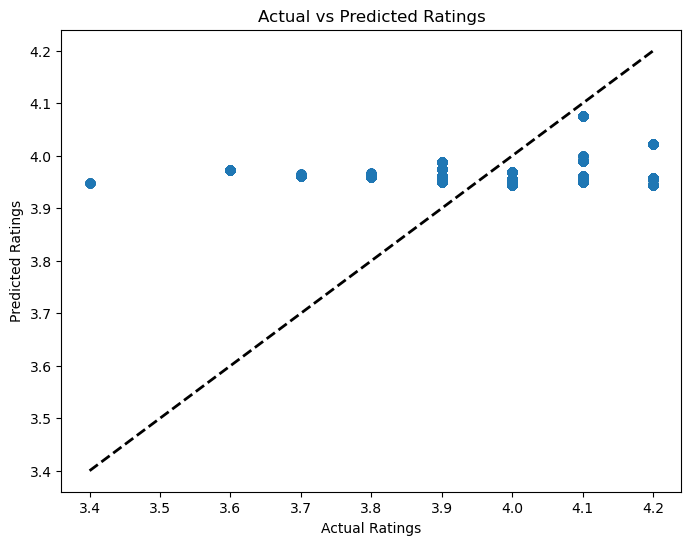

In [17]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('Actual vs Predicted Ratings')
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.show()

In [18]:
# Create a binary column 'is_fake' based on a threshold (example: rating below 3.5)
data['is_fake'] = (data['rating'] < 3.5).astype(int)

In [19]:
# Features and labels for classification
X_classification = data[['company_age', 'company_reviews', 'number_of_employees']].dropna()
y_classification = data.loc[X_classification.index, 'is_fake']

In [20]:
# Train-test split
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X_classification, y_classification, test_size=0.2, random_state=42)

In [21]:
# Use a Random Forest Classifier
classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_train_cls, y_train_cls)

RandomForestClassifier(random_state=42)

In [22]:
# Predictions
y_pred_cls = classifier.predict(X_test_cls)

In [23]:
# Accuracy Score
accuracy = accuracy_score(y_test_cls, y_pred_cls)
print(f"Accuracy Score: {accuracy}")

Accuracy Score: 1.0


In [24]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test_cls, y_pred_cls)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[9122    0]
 [   0   85]]


In [25]:
# Classification Report
class_report = classification_report(y_test_cls, y_pred_cls)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9122
           1       1.00      1.00      1.00        85

    accuracy                           1.00      9207
   macro avg       1.00      1.00      1.00      9207
weighted avg       1.00      1.00      1.00      9207



In [26]:
# Identify fake postings
fake_postings = data[data['is_fake'] == 1]

In [27]:
# Display a summary of fake postings
print("Fake Postings:")
print(fake_postings[['company_name', 'rating', 'company_reviews']])

Fake Postings:
      company_name  rating  company_reviews
350         BYJU'S     3.4             14.4
376         BYJU'S     3.4             14.4
403         BYJU'S     3.4             14.4
431         BYJU'S     3.4             14.4
460         BYJU'S     3.4             14.4
...            ...     ...              ...
45920       BYJU'S     3.4             14.4
45946       BYJU'S     3.4             14.4
45973       BYJU'S     3.4             14.4
46001       BYJU'S     3.4             14.4
46030       BYJU'S     3.4             14.4

[495 rows x 3 columns]


In [55]:
pip install ydata_profiling 

Note: you may need to restart the kernel to use updated packages.


In [57]:
from ydata_profiling import ProfileReport

In [61]:
report =ProfileReport(data,explorative=True)

In [63]:
report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]